In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from glob import glob
from pathlib import Path

In [2]:
EXPERIMENTS = np.arange(20,220,20)
n_experiments = len(EXPERIMENTS)

In [3]:
kfold_df = pd.DataFrame()
reg_df = pd.DataFrame()

In [4]:
for exp in EXPERIMENTS:
    kfold = glob(F"k*{exp}.csv")
    reg = glob(F"r*{exp}.csv")
    kfold_mean = pd.concat([pd.read_csv(j,index_col = 0) for j in kfold], axis = 1).mean(axis = 1)
    kfold_df[exp] = pd.Series(kfold_mean/kfold_mean.sum())
    reg_mean = pd.concat([pd.read_csv(j,index_col = 0) for j in reg], axis = 1).mean(axis = 1)
    reg_df[exp] = pd.Series(reg_mean/reg_mean.sum())


In [5]:
plot_a = pd.DataFrame()
plot_a['RANDOM_CATEGORY'] = kfold_df.loc['RANDOM_CATEGORY']
plot_a['Method'] = 'kfold'
plot_b = pd.DataFrame()
plot_b['RANDOM_CATEGORY'] = reg_df.loc['RANDOM_CATEGORY']
plot_b['Method'] = 'vanilla'


In [6]:
plot = pd.concat([plot_a,plot_b]).reset_index()
plot.columns = ['category_size' ,'RANDOM_CATEGORY', 'Method']

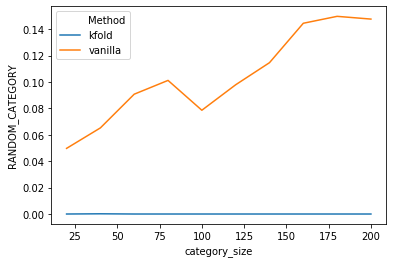

In [8]:
sns.lineplot(x = 'category_size', y = 'RANDOM_CATEGORY', hue = 'Method', data = plot)